In [1]:
import numpy as np 
import pandas as pd 
from PIL import Image
from matplotlib import pyplot as plt
import seaborn as sns
from skimage.io import imread
import cv2
from sklearn import preprocessing
from sklearn import svm
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

In [2]:
# load train and test data
train = pd.read_csv('Train.csv')

train_x = []
for i in train['Path']:
    img = Image.fromarray(cv2.imread(i), 'RGB')
    train_x.append(np.array(img.resize((32,32))))

train_x = np.array(train_x)

train_y = np.array(train['ClassId'].values)
print(train_x.shape)


test = pd.read_csv('Test.csv')

test_x = []
for i in test['Path']:
    img = Image.fromarray(cv2.imread(i), 'RGB')
    test_x.append(np.array(img.resize((32,32))))

test_x = np.array(test_x)

test_y = np.array(test['ClassId'].values)
print(test_x.shape)

(39209, 32, 32, 3)
(12630, 32, 32, 3)


In [3]:
# normalize data
train_x.resize(train_x.shape[0], 32 * 32 * 3)
test_x.resize(test_x.shape[0], 32 * 32 * 3)

train_x = preprocessing.normalize(train_x)
test_x = preprocessing.normalize(test_x)


# train model
svm_clf = svm.NuSVC(nu=0.1, kernel='rbf', gamma=0.001, random_state=8, verbose=10)

svm_clf.fit(train_x, train_y)

svm_clf.score(test_x, test_y)





[LibSVM]

0.7732383214568488

Text(158.22222222222223, 0.5, 'Truth')

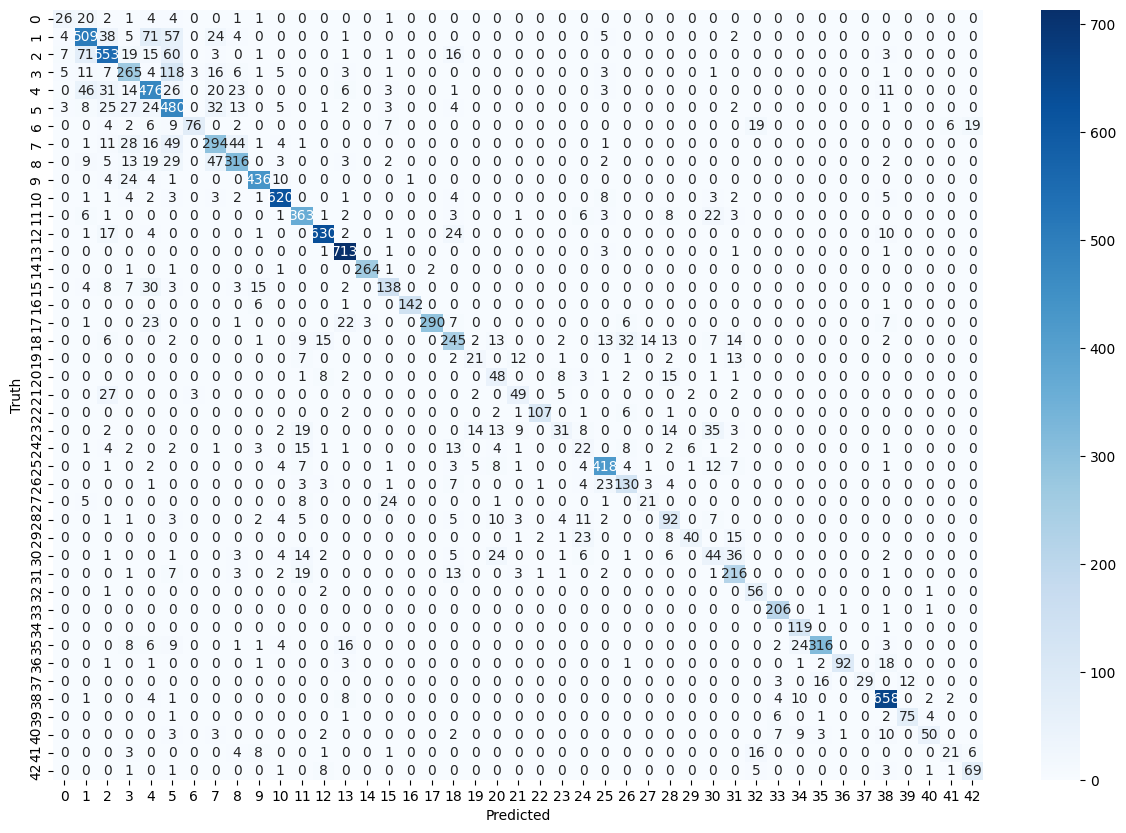

In [4]:
# predict
svm_pred = svm_clf.predict(test_x)

# plot confusion matrix
plt.figure(figsize=(15, 10))
sns.heatmap(confusion_matrix(test_y, svm_pred), annot=True, cmap='Blues', fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Truth')